# Kernel PCA

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

## Importing the dataset

In [2]:
dataset = pd.read_csv('Wine.csv')
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
print("X_train_shape = {}".format(X_train.shape))
print("X_test_shape = {}".format(X_test.shape))
print("y_train_shape = {}".format(y_train.shape))
print("y_test_shape = {}".format(y_test.shape))

X_train_shape = (142, 13)
X_test_shape = (36, 13)
y_train_shape = (142,)
y_test_shape = (36,)


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.876683,0.798429,0.644130,0.129743,0.488532,-0.703262,-1.428468,1.072457,-1.368203,0.351932,0.029017,-1.064122,-0.205908
1,-0.366591,-0.758130,-0.397799,0.333800,-1.413024,-1.441531,-0.502998,1.701100,0.023668,-0.841146,0.029017,-0.730832,-0.817047
2,-1.696894,-0.344248,-0.323375,-0.453279,-0.145320,1.249050,0.319642,-1.520697,-0.434631,-0.756829,0.901974,0.519005,-1.312565
3,0.516134,1.383263,0.420859,1.004275,0.136392,-0.752480,-1.233091,0.522394,-0.332787,0.950579,-1.105828,-1.425187,0.025334
4,0.640461,-0.506202,0.904612,0.129743,-0.286176,0.445157,0.679547,-0.656312,0.091564,-0.643002,0.727382,1.713295,0.339162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-1.448239,-0.587179,-1.811844,-0.016013,-0.990456,0.395939,-0.317904,0.050911,-0.315813,-1.258512,-0.058279,-0.203123,-1.081323
138,-0.764438,-1.082039,-1.662997,0.013139,-1.553880,-0.243895,0.052284,-0.734893,-0.960826,-0.153967,0.727382,1.241134,-0.767495
139,-0.702275,-0.686151,-0.658281,0.858519,0.558960,-0.424360,0.144831,-0.184830,0.006694,-1.258512,0.465495,0.519005,-1.312565
140,1.137771,-0.623169,-0.918763,-1.036300,0.065964,1.380298,1.481621,-1.206375,0.906318,0.444680,-0.189223,1.032828,0.801646


## Applying Kernel PCA

In [10]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [11]:
pd.DataFrame(X_train)

,0,1
0,0.465407,-0.234346
1,0.286349,0.304782
2,-0.120875,0.426630
3,0.571593,-0.373166
4,-0.430393,0.078098
...,...,...
137,0.081877,0.560225
138,-0.041896,0.486269
139,0.013705,0.533377
140,-0.538402,-0.225160


## Training the Logistic Regression model on the Training set

In [13]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

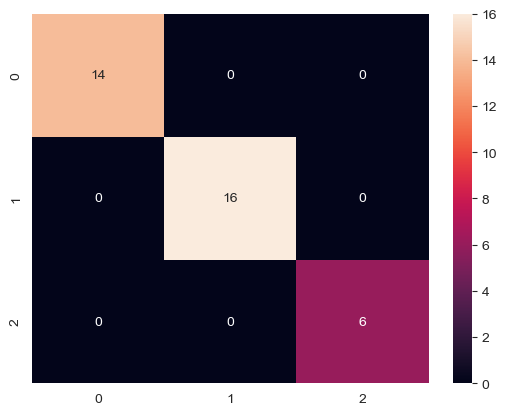

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

In [16]:
accuracy_score(y_test, y_pred)

1.0

## Visualising the Training set results

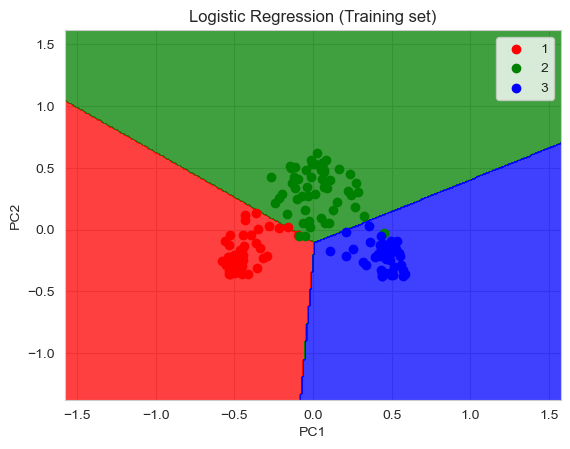

In [18]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

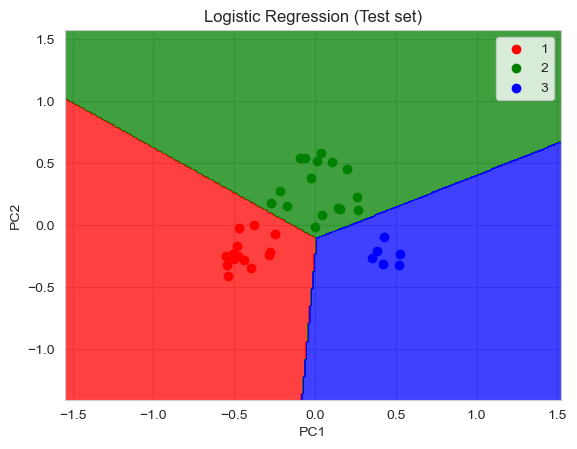

In [19]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()